/Users/sivaramkommineni/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy: 0.99
Precision: 1.00
Recall: 0.97
MCC: 0.97


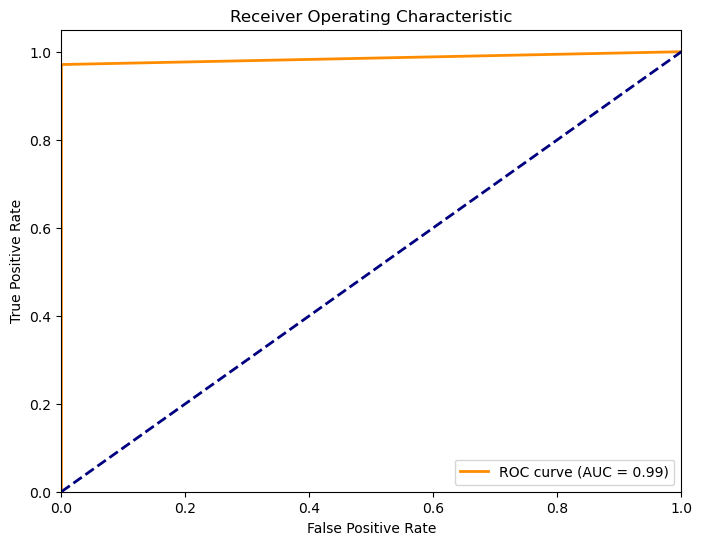

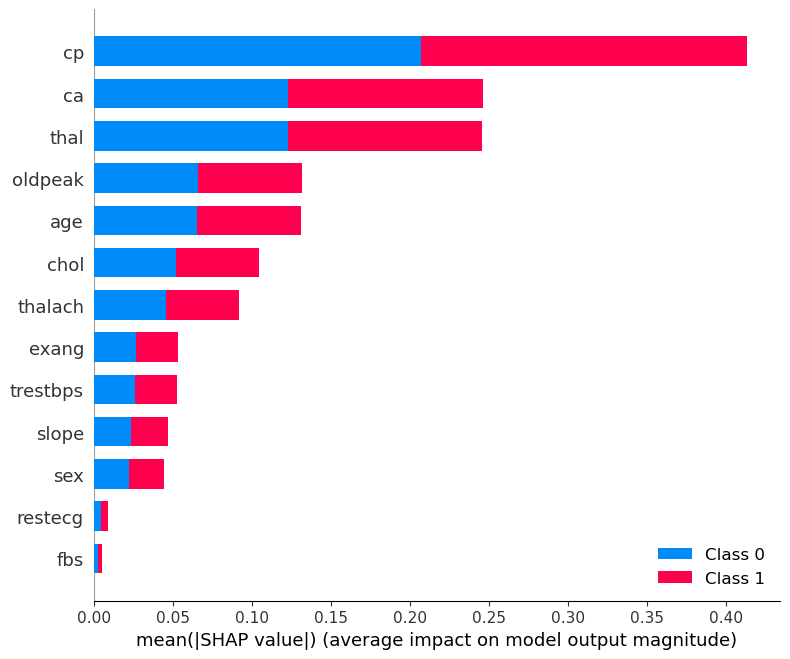

In [1]:
#decision tree
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt
import shap

# Load the heart disease dataset
data = pd.read_csv("/Users/sivaramkommineni/Downloads/heart 2.csv")  # Replace "heart.csv" with the path to your dataset file

# Split the dataset into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision, recall, and MCC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"MCC: {mcc:.2f}")

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('fig1.eps')
plt.show()

# Explain the model using SHAP
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


7/7 [==============================] - 0s 517us/step
Accuracy: 0.99
Precision: 1.00
Recall: 0.97
MCC: 0.97
ROC AUC: 0.99


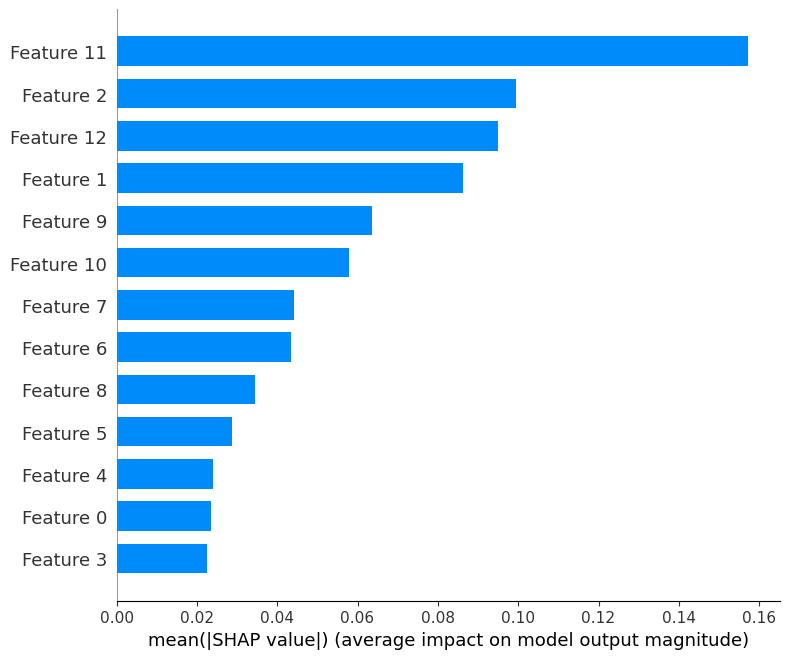

AttributeError: 'Permutation' object has no attribute 'expected_value'

In [2]:
# neural network
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, matthews_corrcoef, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import shap
import matplotlib.pyplot as plt

# Load the heart disease dataset
data = pd.read_csv("/Users/sivaramkommineni/Downloads/heart 2.csv")  # Replace "heart.csv" with the path to your dataset file

# Split the dataset into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Explain the model using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary plot of feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Force plot for a specific prediction (change the index as needed)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0, :])


7/7 [==============================] - 0s 426us/step


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy: 0.99
Precision: 1.00
Recall: 0.97
MCC: 0.97


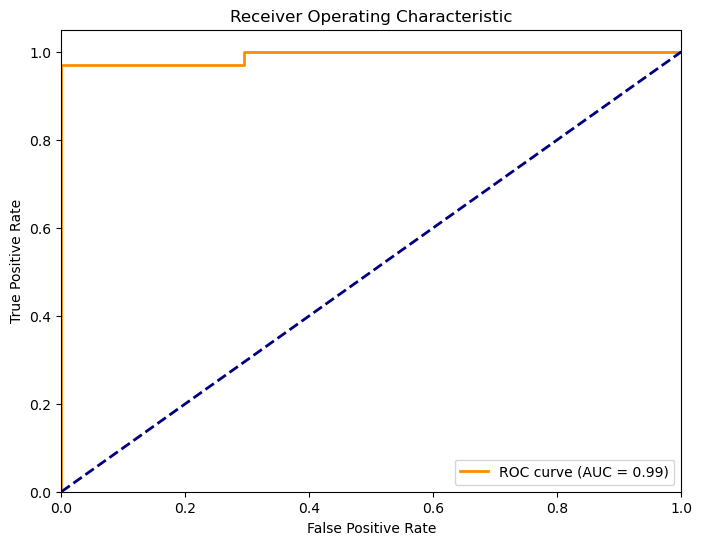

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


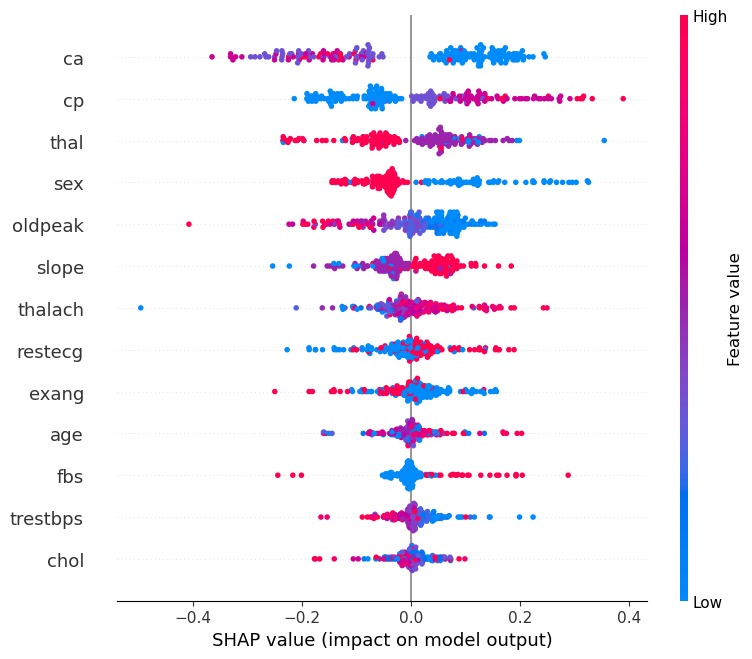

In [3]:
#neural network
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import shap

# Load the heart disease dataset
data = pd.read_csv("/Users/sivaramkommineni/Downloads/heart 2.csv")    # Replace "heart.csv" with the path to your dataset file

# Split the dataset into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision, recall, and MCC
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"MCC: {mcc:.2f}")

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('fig2.eps')
plt.show()

# Explain the model using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy: 0.80
Precision: 0.76
Recall: 0.87
MCC: 0.60


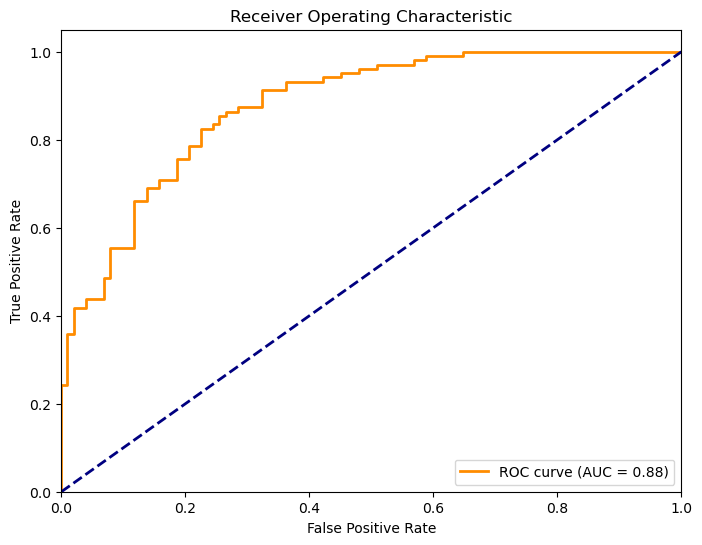

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


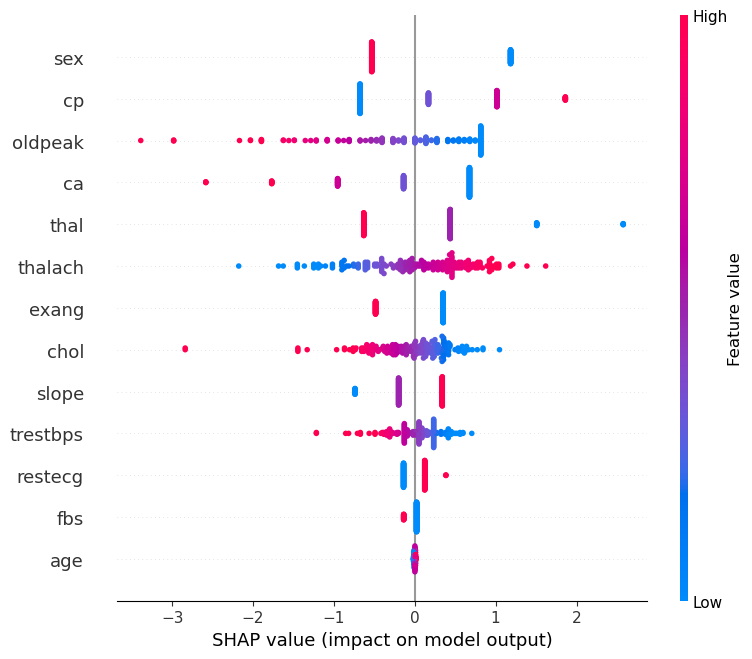

In [4]:
# logistic regression
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt
import shap

# Load the heart disease dataset
data = pd.read_csv("/Users/sivaramkommineni/Downloads/heart 2.csv")  # Replace "heart.csv" with the path to your dataset file

# Split the dataset into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision, recall, and MCC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"MCC: {mcc:.2f}")

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('fig3.eps')
plt.show()

# Explain the model using SHAP
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy: 0.88
Precision: 0.89
Recall: 0.86
Matthews Correlation Coefficient (MCC): 0.76
ROC AUC: 0.95


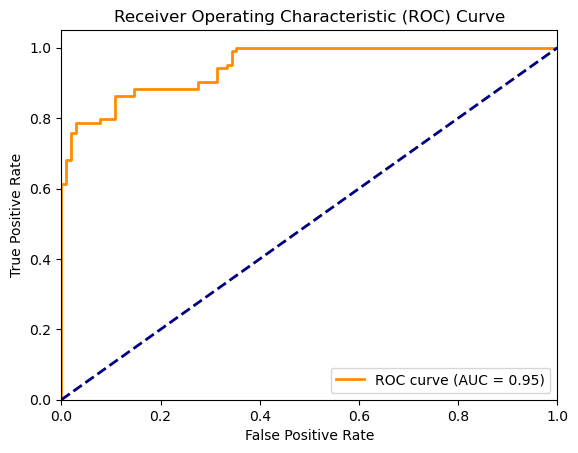

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names


In [5]:
#Adaboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, matthews_corrcoef, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# Load the dataset
data = pd.read_csv("/Users/sivaramkommineni/Downloads/heart 2.csv")

# Define the features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred)

# Calculate ROC and AUC
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('fig4.eps')
plt.show()

# Use LIME for explanation
explainer = LimeTabularExplainer(X_train.values, mode="classification")

# Select a sample from the test data for explanation
sample_idx = 0
explanation = explainer.explain_instance(X_test.values[sample_idx], clf.predict_proba)

# Print the explanation
explanation.show_in_notebook()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy: 0.80
Precision: 0.75
Recall: 0.89
Matthews Correlation Coefficient (MCC): 0.61
ROC AUC: 0.87


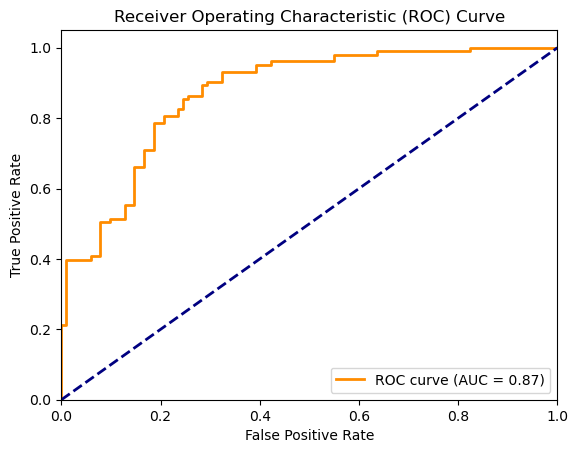

X does not have valid feature names, but GaussianNB was fitted with feature names


In [6]:
#Naive bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from lime.lime_tabular import LimeTabularExplainer
from sklearn.metrics import accuracy_score, precision_score, recall_score, matthews_corrcoef, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/Users/sivaramkommineni/Downloads/heart 2.csv")
# Define the features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred)

# Calculate ROC and ROC AUC
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('fig5.eps')
plt.show()

# Use LIME for explanation
explainer = LimeTabularExplainer(X_train.values, mode="classification")

# Select a sample from the test data for explanation
sample_idx = 0
explanation = explainer.explain_instance(X_test.values[sample_idx], clf.predict_proba)

# Print the explanation
explanation.show_in_notebook()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


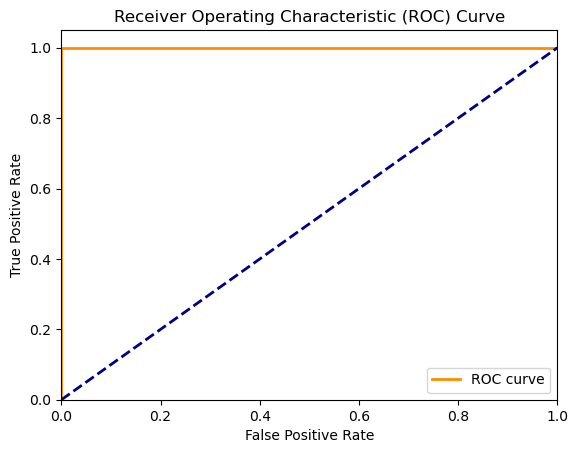

Accuracy: 0.99
Precision: 1.00
Recall: 0.97
Matthews Correlation Coefficient (MCC): 0.97


In [7]:
#Random Forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer
from sklearn.metrics import accuracy_score, precision_score, recall_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/Users/sivaramkommineni/Downloads/heart 2.csv")

# Define the features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_probs = clf.predict_proba(X_test)[:, 1]

# Calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred)

# Calculate ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('fig6.eps')
plt.show()

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy: 0.99
Precision: 1.00
Recall: 0.97
Matthews Correlation Coefficient (MCC): 0.97
ROC AUC: 1.00


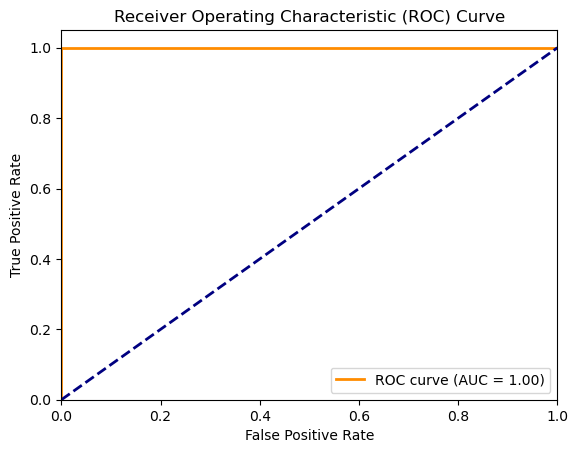

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [8]:
#knn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer
from sklearn.metrics import accuracy_score, precision_score, recall_score, matthews_corrcoef, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/Users/sivaramkommineni/Downloads/heart 2.csv")

# Define the features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred)

# Calculate ROC and ROC AUC
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('fig7.eps')
plt.show()

# Use LIME for explanation
explainer = LimeTabularExplainer(X_train.values, mode="classification")

# Select a sample from the test data for explanation
sample_idx = 0
explanation = explainer.explain_instance(X_test.values[sample_idx], clf.predict_proba)

# Print the explanation
explanation.show_in_notebook()
